True


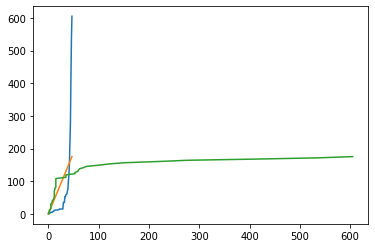

In [5]:
from pprint import pprint as pp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import Model
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib.etl import df_us
import lib.models as models


# Aggregated US data
_df = df_us.groupby('day').sum().reset_index()
_df = _df[['day', 'cases']]
pp(hasattr(_df, '__array__'))

# Pick a model. See models.py
model = models.lmodel
result = model.fit(_df.cases, day=_df.day, m=1)

# mpl.style.use('dark_background')
plt.plot(_df.day, _df.cases)
plt.plot(_df, result.best_fit, label='best fit')
plt.show()